# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# omsky_gamedev

# Основное задание

### Загрузите датасет для регрессии.

In [49]:
models = pd.read_csv('../Data/energy_task_moded.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60.0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


## Решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;

### Разбиваем на выборку

In [40]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.7)


### Обуение

In [41]:
reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test)

array([ 34.03942519,  93.90396831,  33.34935291, ...,  89.00937336,
       122.0452582 ,  50.08987206])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [42]:
print(f"MAE: {mean_absolute_error(reg.predict(X_test), y_test)}",
      f'RMSE: {mean_squared_error(reg.predict(X_test), y_test)}',
      f'MSE: {mean_squared_error(reg.predict(X_test), y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(reg.predict(X_test), y_test)}',
      f'R^2: {reg.score(X_test, y_test)}',
      sep='\n')


MAE: 53.372304770498076
RMSE: 8916.806517719837
MSE: 94.42884367458831
MAPE: 0.5999985564611633
R^2: 0.15995777651128618


### Значение весов.

In [43]:
print(len(reg.coef_), reg.coef_, sep='\n')


29
[ 2.08250809e+00 -3.13839421e+00  1.40920679e+01 -1.29246911e+01
 -1.10674255e+01  2.70287701e+01  4.65885750e+00 -5.19675581e+00
 -3.66481756e+00  1.80765885e+00 -1.02424370e-01  6.40277675e+00
  2.80076490e-02 -8.89213758e-01 -1.44494332e+00  6.51189770e+00
 -3.63218265e+00 -1.03446571e+01  1.18077807e-01 -5.14843905e+00
  3.48378152e-01  2.74970551e-01  1.99860945e+00 -8.03213094e-03
  4.73321153e-01 -3.46560615e-01 -1.17557217e+01  0.00000000e+00
  1.72513937e-02]


### Предварительные результаты

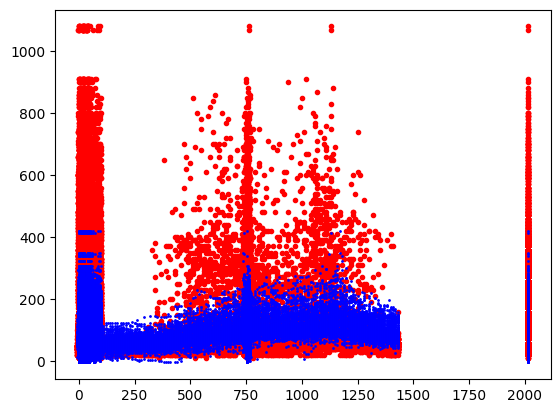

In [44]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, reg.predict(X_test), 'bo', markersize=1)

### Ridge

In [57]:
ridge = Ridge(alpha=0.4).fit(X_train, y_train)
y_result = ridge.predict(X_test)
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge.score(X_test, y_test)}',
      sep='\n')
ridge.coef_

MAE: 53.37199289760862
RMSE: 8916.805253529554
MSE: 94.42883698071026
MAPE: 0.5989689475010951
R^2: 0.15995789560921836


array([ 2.08257289e+00, -3.13803848e+00,  1.40901174e+01, -1.29184073e+01,
       -1.10645081e+01,  2.70229653e+01,  4.65890202e+00, -5.19748480e+00,
       -3.66495787e+00,  1.80566288e+00, -1.02402071e-01,  6.40171700e+00,
        2.80574714e-02, -8.90013529e-01, -1.44515236e+00,  6.51035452e+00,
       -3.63197443e+00, -1.03411251e+01,  1.18293123e-01, -5.14757962e+00,
        3.48301454e-01,  2.74875806e-01,  1.99874300e+00, -8.02723563e-03,
        4.72550892e-01, -3.46359045e-01, -1.17495031e+01,  0.00000000e+00,
        1.72523262e-02])

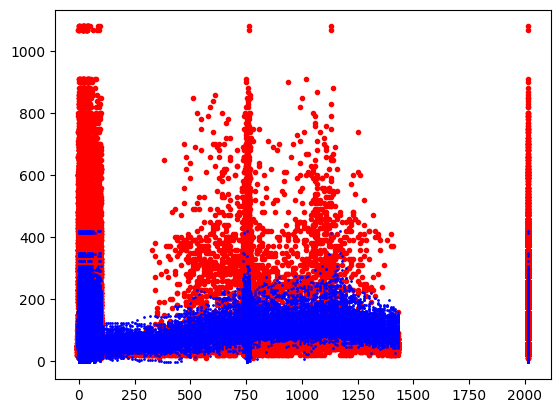

In [51]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, ridge.predict(X_test), 'bo', markersize=1)

### Lasso

In [48]:
lasso = Lasso(alpha=0.7).fit(X_train, y_train)
print(f"MAE: {mean_absolute_error(reg.predict(X_test), y_test)}",
      f'RMSE: {mean_squared_error(reg.predict(X_test), y_test)}',
      f'MSE: {mean_squared_error(reg.predict(X_test), y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(reg.predict(X_test), y_test)}',
      f'R^2: {reg.score(X_test, y_test)}',
      sep='\n')
lasso.coef_

MAE: 53.372304770498076
RMSE: 8916.806517719837
MSE: 94.42884367458831
MAPE: 0.5999985564611633
R^2: 0.15995777651128618


array([ 2.11444845e+00, -6.56722612e-01,  1.30932605e+01, -9.91247583e+00,
       -9.45038649e+00,  2.33938585e+01,  3.94502168e+00, -5.52124240e+00,
       -3.03401848e+00, -0.00000000e+00, -7.02555056e-02,  5.24386179e+00,
        6.52956848e-02, -0.00000000e+00, -1.75859417e+00,  3.43458102e+00,
       -3.23436513e+00, -8.28568413e+00,  0.00000000e+00, -4.25687926e+00,
        2.17905544e-01,  1.60906545e-01,  1.84195306e+00,  2.07306511e-03,
       -0.00000000e+00, -2.19366928e-01, -7.42986626e+00,  0.00000000e+00,
        1.77018717e-02])